In [1]:
#Install the dependencies
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use('bmh')

In [2]:
#Store the data into a data frame
df = pd.read_csv('NFLX.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-12-16,119.800003,123.000000,118.089996,122.639999,122.639999,13181000
1,2015-12-17,123.970001,126.349998,122.419998,122.510002,122.510002,17284900
2,2015-12-18,120.849998,122.190002,117.919998,118.019997,118.019997,17948100
3,2015-12-21,119.510002,119.589996,115.660004,116.629997,116.629997,11670000
4,2015-12-22,117.300003,117.430000,114.860001,116.239998,116.239998,9689000


In [3]:
#Get the number of trading days
df.shape

(1007, 7)

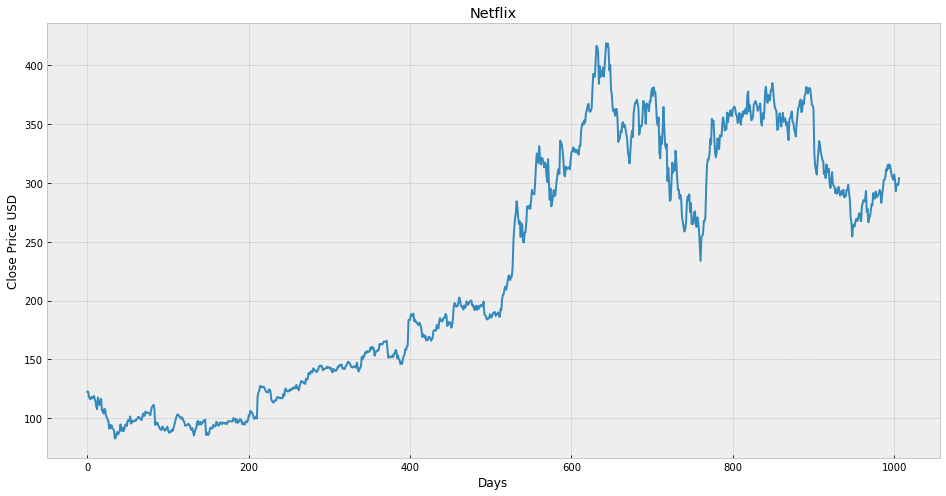

In [4]:
#Visualize the close price data
plt.figure(figsize=(16,8))
plt.title('Netflix')
plt.xlabel('Days')
plt.ylabel('Close Price USD')
plt.plot(df['Close'])
plt.show()

In [5]:
#Get the close price
df = df[['Close']]
df.head()

,Close
0,122.639999
1,122.510002
2,118.019997
3,116.629997
4,116.239998


In [6]:
#Create variable to predict 'x' dats out into the future
future_days = 15
#Create a new column(target) shifted 'x' units/days up
df['Prediction'] = df[['Close']].shift(-future_days)
df.tail()

,Close,Prediction
1002,293.119995,NaN
1003,298.929993,NaN
1004,298.440002,NaN
1005,298.500000,NaN
1006,304.209991,NaN


In [7]:
#Create the feature data set (X) and convert it to numpy array and remove the last 'x' rows/days
X = np.array(df.drop(['Prediction'], 1))[:-future_days]
print(X)

[[122.639999]
 [122.510002]
 [118.019997]
 [116.629997]
 [116.239998]
 [118.160004]
 [117.330002]
 [117.110001]
 [119.120003]
 [116.709999]
 [114.379997]
 [109.959999]
 [107.660004]
 [117.68    ]
 [114.559998]
 [111.389999]
 [114.970001]
 [116.580002]
 [106.559998]
 [107.059998]
 [104.040001]
 [107.889999]
 [107.739998]
 [102.349998]
 [100.720001]
 [ 99.120003]
 [ 97.830002]
 [ 91.150002]
 [ 94.410004]
 [ 91.839996]
 [ 94.089996]
 [ 91.489998]
 [ 90.739998]
 [ 89.709999]
 [ 82.790001]
 [ 83.32    ]
 [ 86.129997]
 [ 88.449997]
 [ 86.349998]
 [ 87.400002]
 [ 89.050003]
 [ 94.760002]
 [ 90.489998]
 [ 89.230003]
 [ 91.93    ]
 [ 89.120003]
 [ 91.610001]
 [ 94.529999]
 [ 94.790001]
 [ 93.410004]
 [ 98.300003]
 [ 97.610001]
 [ 97.93    ]
 [101.580002]
 [ 95.489998]
 [ 96.230003]
 [ 98.      ]
 [ 97.360001]
 [ 97.660004]
 [ 98.129997]
 [ 97.860001]
 [ 99.349998]
 [ 99.720001]
 [101.120003]
 [101.059998]
 [ 99.839996]
 [ 99.589996]
 [ 98.360001]
 [101.209999]
 [104.129997]
 [102.190002]
 [102.

In [8]:
#Create the target data set (y) and convert it to numpy array ange get all of the target values except the last 'x' rows/days
y = np.array(df['Prediction'])[:-future_days]
print (y)

[111.389999 114.970001 116.580002 106.559998 107.059998 104.040001
 107.889999 107.739998 102.349998 100.720001  99.120003  97.830002
  91.150002  94.410004  91.839996  94.089996  91.489998  90.739998
  89.709999  82.790001  83.32      86.129997  88.449997  86.349998
  87.400002  89.050003  94.760002  90.489998  89.230003  91.93
  89.120003  91.610001  94.529999  94.790001  93.410004  98.300003
  97.610001  97.93     101.580002  95.489998  96.230003  98.
  97.360001  97.660004  98.129997  97.860001  99.349998  99.720001
 101.120003 101.059998  99.839996  99.589996  98.360001 101.209999
 104.129997 102.190002 102.230003 105.699997 104.349998 104.940002
 104.830002 104.449997 103.809998 102.68     106.980003 109.650002
 110.419998 111.510002 108.400002  94.339996  96.769997  94.980003
  95.900002  93.559998  92.43      91.040001  90.279999  90.029999
  93.110001  91.540001  90.790001  89.370003  90.839996  90.540001
  92.889999  90.019997  87.739998  87.879997  89.120003  88.629997
  90.

In [9]:
#Split the data into %75 training and testing
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [10]:
#Create the models
#create the decision tree regressor model
tree = DecisionTreeRegressor().fit(x_train, y_train)
#Create the linear regression model
lr = LinearRegression().fit(x_train, y_train)

In [11]:
#Get the last 'x' rows of the future data set
x_future = df.drop(['Prediction'], 1)[:-future_days]
x_future = x_future.tail(future_days)
x_future = np.array(x_future)
x_future

array([[292.859985],
       [288.029999],
       [288.589996],
       [289.570007],
       [291.570007],
       [294.179993],
       [292.01001 ],
       [283.109985],
       [289.619995],
       [295.029999],
       [302.570007],
       [302.600006],
       [305.160004],
       [311.690002],
       [310.480011]])

In [12]:
#Show the model tree prediction
tree_prediction = tree.predict(x_future)
print(tree_prediction)
print()
#Show the model linear regression prediction
lr_prediction = lr.predict(x_future)
print(lr_prediction)

[315.549988 312.48999  315.929993 314.660004 309.98999  306.160004
 304.320007 302.859985 307.350006 302.5      298.929993 298.929993
 298.440002 298.5      310.829987]

[294.16163564 289.47012889 290.01407037 290.96598373 292.90864226
 295.44379804 293.33603005 284.69117532 291.01453854 296.26943374
 303.59326416 303.62240306 306.10900404 312.45178219 311.27648252]


D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


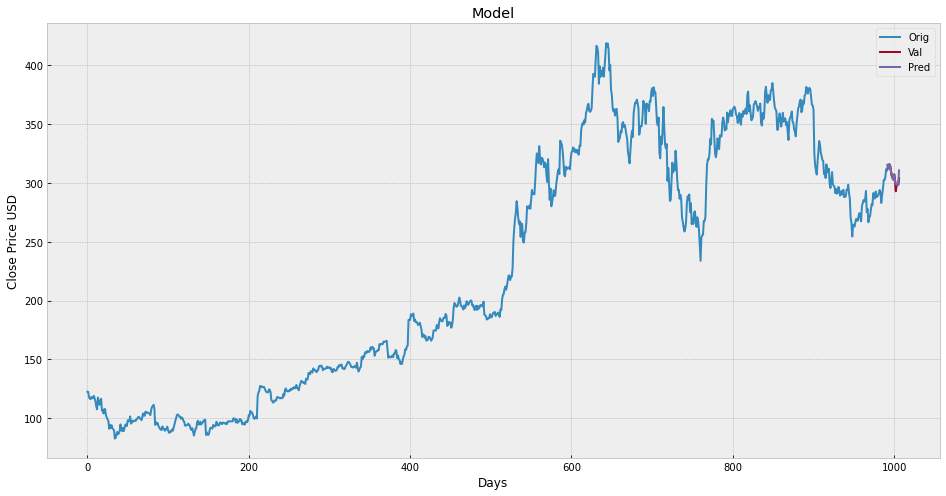

In [13]:
#Visualize the data
predictions = tree_prediction

valid = df[X.shape[0]:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Close Price USD')
plt.plot(df['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Orig', 'Val', 'Pred'])
plt.show()

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


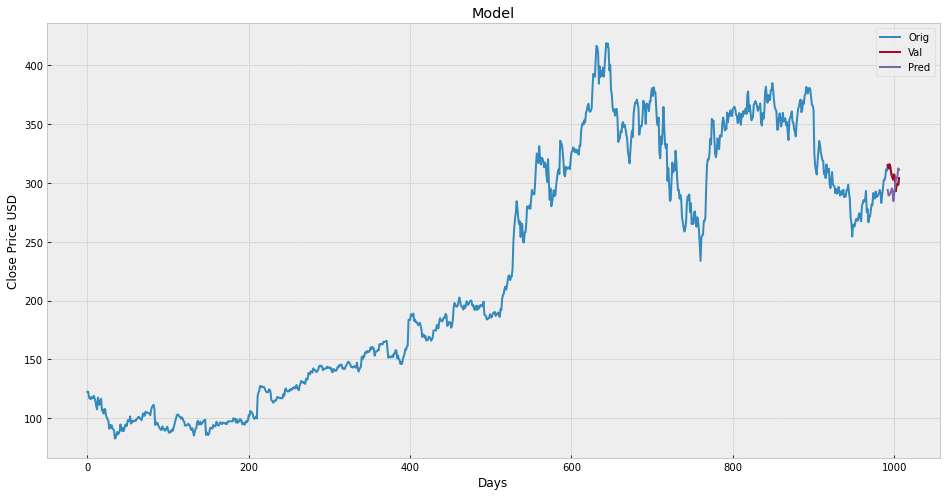

In [14]:
#Visualize the data
predictions = lr_prediction

valid = df[X.shape[0]:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Close Price USD')
plt.plot(df['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Orig', 'Val', 'Pred'])
plt.show()